In [67]:
!pip install xgboost

In [68]:
import xgboost
print(xgboost.__version__)


3.1.3


In [69]:
#1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #Optional
from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
import joblib



In [70]:
#2. Load Pre-Processed Dataset,Data-Frame as data
data = pd.read_csv("pre-processedd.csv")
data.head()


,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_lum,st_met,pl_insol,Target_Habitability,...,Star_Type_B,Star_Type_D,Star_Type_F,Star_Type_G,Star_Type_K,Star_Type_L,Star_Type_M,Star_Type_T,Star_Type_W,Stellar_Compatibility
0,-0.357554,4.112518,-0.024711,-0.037713,-0.093477,-0.384423,3.966854,-1.769338,-0.081864,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.840104
1,-0.357554,3.899939,-0.023503,-0.036641,-0.093477,-0.857096,0.056449,-0.227448,-0.081864,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.577405
2,-0.357554,0.616646,-0.025565,-0.038940,-0.093477,-0.374412,3.706981,-1.448111,-0.081864,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.818612
3,-0.357554,1.936297,-0.015686,-0.032852,-0.093477,0.098977,0.056449,0.029533,-0.081864,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.632465
4,-0.357554,0.094249,-0.021736,-0.036245,-0.093477,0.241994,0.056449,0.286515,-0.081864,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.296003


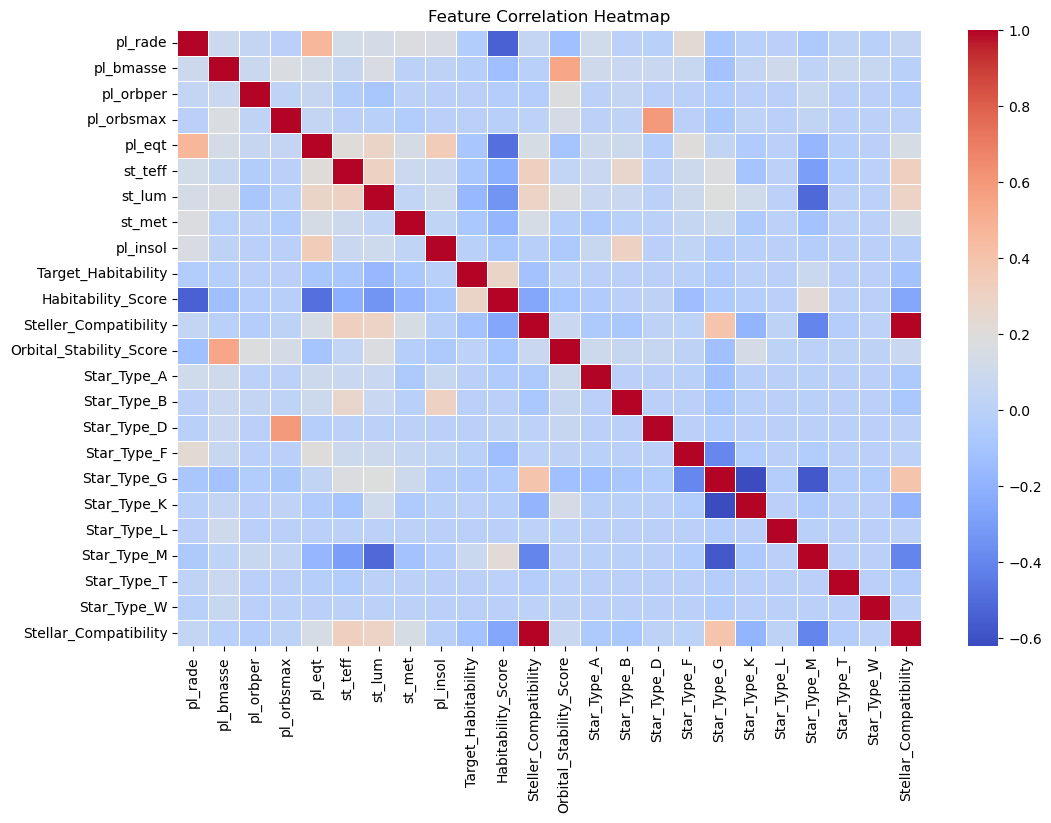

In [71]:
#CORRELATION ANALYSIS CODE
#Import Required Libraries
"""import seaborn as sns
import matplotlib.pyplot as plt
"""
#Compute Correlation Matrix
correlation_matrix = data.corr()

#View Correlation Values (Optional)
correlation_matrix.head()

#Plot Correlation Heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap")
plt.show()


In [72]:
#Correlation with Target Variable (IMPORTANT)
#This shows which features are most related to habitability.
target_correlation = correlation_matrix["Target_Habitability"].sort_values(ascending=False)

target_correlation


Target_Habitability        1.000000
Habitability_Score         0.281480
Star_Type_M                0.078046
Orbital_Stability_Score    0.009138
Star_Type_K                0.001557
Star_Type_T               -0.000890
Star_Type_L               -0.000890
Star_Type_D               -0.001259
Star_Type_W               -0.001259
pl_orbper                 -0.001819
Star_Type_B               -0.002519
pl_orbsmax                -0.002808
Star_Type_A               -0.003675
pl_insol                  -0.011179
Star_Type_F               -0.011448
pl_bmasse                 -0.022124
pl_rade                   -0.042280
Star_Type_G               -0.044601
st_met                    -0.074046
st_teff                   -0.081831
pl_eqt                    -0.087286
Steller_Compatibility     -0.108036
Stellar_Compatibility     -0.108036
st_lum                    -0.169763
Name: Target_Habitability, dtype: float64

In [73]:
#Top Positively Correlated Features
target_correlation.head(10)


Target_Habitability        1.000000
Habitability_Score         0.281480
Star_Type_M                0.078046
Orbital_Stability_Score    0.009138
Star_Type_K                0.001557
Star_Type_T               -0.000890
Star_Type_L               -0.000890
Star_Type_D               -0.001259
Star_Type_W               -0.001259
pl_orbper                 -0.001819
Name: Target_Habitability, dtype: float64

In [74]:
#Top Negatively Correlated Features
target_correlation.tail(10)


Star_Type_F             -0.011448
pl_bmasse               -0.022124
pl_rade                 -0.042280
Star_Type_G             -0.044601
st_met                  -0.074046
st_teff                 -0.081831
pl_eqt                  -0.087286
Steller_Compatibility   -0.108036
Stellar_Compatibility   -0.108036
st_lum                  -0.169763
Name: Target_Habitability, dtype: float64

In [75]:
#MULTICOLLINEARITY ANALYSIS (VIF)
#Import Required Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Prepare Feature Matrix (Exclude Target)
X_vif = X.copy()

#Create VIF DataFrame
vif_data = pd.DataFrame()

vif_data["Feature"] = X_vif.columns

vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

#View VIF Scores
vif_data

c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,pl_rade,1.711756
1,pl_bmasse,1.596327
2,pl_orbper,1.075218
3,pl_orbsmax,1.617505
4,pl_eqt,1.783502
5,st_teff,1.352073
6,st_lum,1.641303
7,st_met,1.077201
8,pl_insol,1.277464
9,Habitability_Score,1.850362


In [76]:
print(data.columns)

Index(['pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_orbsmax', 'pl_eqt', 'st_teff',
       'st_lum', 'st_met', 'pl_insol', 'Target_Habitability',
       'Habitability_Score', 'Steller_Compatibility',
       'Orbital_Stability_Score', 'Star_Type_A', 'Star_Type_B', 'Star_Type_D',
       'Star_Type_F', 'Star_Type_G', 'Star_Type_K', 'Star_Type_L',
       'Star_Type_M', 'Star_Type_T', 'Star_Type_W', 'Stellar_Compatibility'],
      dtype='object')


In [77]:
#3. Separate Features and Target
X = data.drop("Target_Habitability", axis=1)
y = data["Target_Habitability"]



In [78]:
#4. Train–Test Split (80–20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [79]:
#5. Logistic Regression (Baseline)
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])
log_reg.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [80]:
#6. Decision Tree (Baseline)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [81]:
#7. Random Forest (Primary)
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)



,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
#8. XGBoost (Primary Model)
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [83]:
#9. Support Vector Machine (Optional)
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(
        kernel="rbf",
        probability=True,
        C=1.0,
        gamma="scale",
        random_state=42
    ))
])
svm.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [84]:
#10. Model Evaluation Function (COMMON FOR ALL)
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [85]:
#11. Evaluate All Models
print("Logistic Regression")
evaluate_model(log_reg, X_test, y_test)

print("Decision Tree")
evaluate_model(dt, X_test, y_test)

print("Random Forest")
evaluate_model(rf, X_test, y_test)

print("XGBoost")
evaluate_model(xgb, X_test, y_test)

#Optional
print("SVM")
evaluate_model(svm, X_test, y_test) 

Logistic Regression
Accuracy : 0.9942291838417148
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
ROC-AUC  : 0.9940624136978735

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1207
           1       0.00      0.00      0.00         6

    accuracy                           0.99      1213
   macro avg       0.50      0.50      0.50      1213
weighted avg       0.99      0.99      0.99      1213

Decision Tree
Accuracy : 0.9958779884583677
Precision: 0.6666666666666666
Recall   : 0.3333333333333333
F1 Score : 0.4444444444444444
ROC-AUC  : 0.6662524164595416

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1207
           1       0.67      0.33      0.44         6

    accuracy                           1.00      1213
   macro avg       0.83      0.67      0.72      1213
weighted avg       1.00      1.00      1.00      1213

Random 

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\anaconda3\Lib\site-packag

In [86]:
#12.Save Final Model (XGBoost)
joblib.dump(xgb, "final_model.pkl")


['final_model.pkl']

In [87]:
#13. Save Model Output CSV
predictions = X_test.copy()
predictions["actual"] = y_test.values
predictions["predicted"] = xgb.predict(X_test)
predictions["probability"] = xgb.predict_proba(X_test)[:, 1]
predictions.to_csv(
    "model_predictions.csv",
    index=False
)


In [88]:
#14. Habitability Ranking (Final Output)
ranking = data.copy()
ranking["habitability_score"] = xgb.predict_proba(X)[:, 1]
ranking = ranking.sort_values(
    by="habitability_score",
    ascending=False
)
ranking.to_csv(
    "habitability_ranked.csv",
    index=False
)


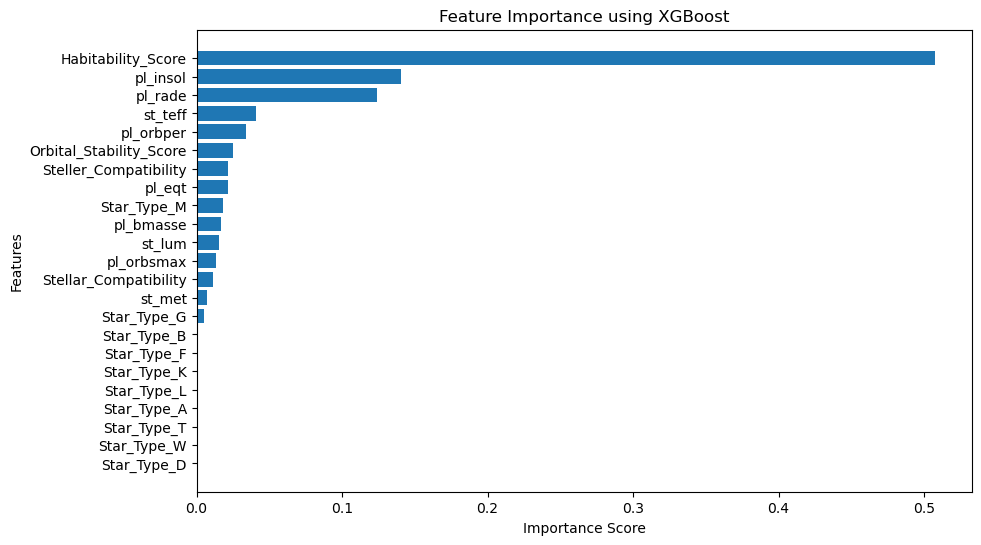

In [89]:
#15.Feature Importance (Mandatory)
#Import matplotlib
#import matplotlib.pyplot as plt
#Extract Feature Names
feature_names = X.columns
#Get Feature Importance Values (XGBoost)
importance_values = xgb.feature_importances_
#Create DataFrame for Better Viewing
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance_values
})
#Sort Features by Importance (Descending)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance",
    ascending=False
)
#Display Top Features
feature_importance_df.head(10)
#Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using XGBoost")
plt.show()




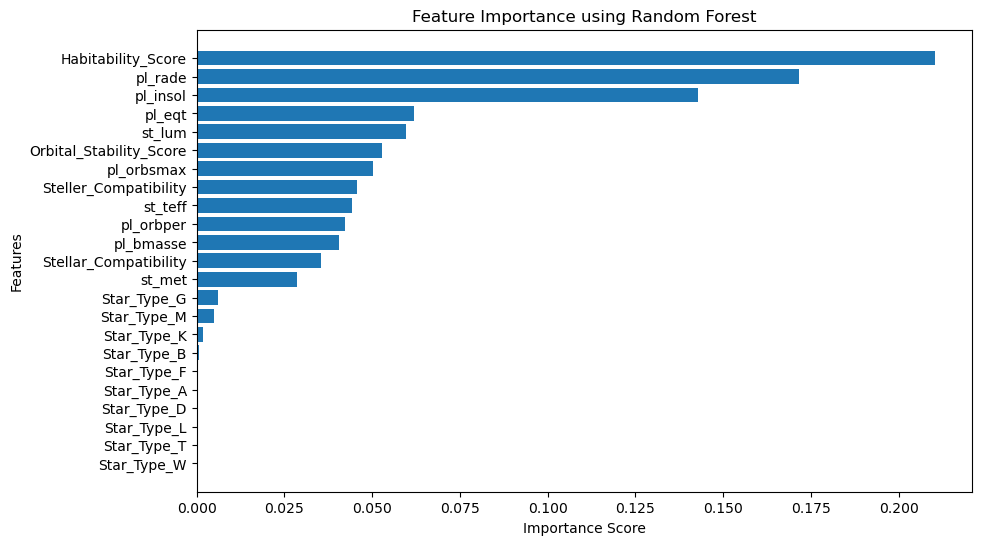

In [90]:
#OPTIONAL: RANDOM FOREST FEATURE IMPORTANCE FOR COMPARISION
rf_importance = rf.feature_importances_

rf_feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_importance
})

rf_feature_importance_df = rf_feature_importance_df.sort_values(
    by="Importance",
    ascending=False
)

rf_feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(
    rf_feature_importance_df["Feature"],
    rf_feature_importance_df["Importance"]
)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()


In [3]:
ranking.shape

NameError: name 'ranking' is not defined